<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [6]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
RS = 42

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [7]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, delimiter=';')

1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [8]:
clfs = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=RS),
    'Bagging Classifier': BaggingClassifier(n_estimators=100, random_state=RS),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=RS)
}

x = data.loc[:,:'alcohol']
y = data['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=RS, test_size=0.3)
results = {}
for clf_name, clf in clfs.items():
    model = clf.fit(x_train, y_train)
    results[clf_name] = model.score(x_test, y_test)
pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

,accuracy
Random Forest Classifier,0.654167
Bagging Classifier,0.641667
Decision Tree Classifier,0.572917


Ансамбль моделей дает лучшую точность чем одно дерево решений

2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [10]:
from sklearn.metrics import accuracy_score
estim_cnt = [10, 50, 100] + [x for x in range(200, 5001, 200)]
results = {}
for x in estim_cnt:
    model = RandomForestClassifier(n_estimators=x, random_state=RS, n_jobs=-1).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[x] = accuracy_score(y_test, y_pred)
pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

,accuracy
10,0.658333
50,0.697917
100,0.706250
200,0.695833
400,0.700000
600,0.697917
800,0.714583
1000,0.710417
1200,0.708333
1400,0.706250


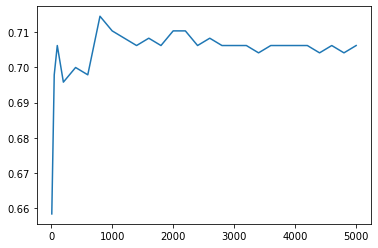

In [11]:
from matplotlib import pyplot as plt
plt.plot(results.keys(),results.values())
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [12]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from xgboost import XGBClassifier as XGB
from sklearn.model_selection import cross_val_score
clfs = {
    'Gradient Boosting Classifier': GBC(random_state=RS),
    'XGB Classifier': XGB(random_state=RS)
}
results = {}
for clf_name, clf in clfs.items():
    clf.fit(x_train, y_train)
    results[clf_name] = np.mean(cross_val_score(clf, x_test, y_test, scoring="accuracy",cv=3))
pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy
Gradient Boosting Classifier,0.56875
XGB Classifier,0.58750


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [13]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime
params_gbc = {
    'learning_rate': [0.2, 0.25, 0.3],
    'n_estimators': [5, 6, 7],
    'max_depth': [6, 7, 8]
}
params_xgb = {
    'learning_rate': [0.24, 0.25, 0.3, 0.35, 0.4],
    'n_estimators': [24, 26, 29, 32],
    'max_depth': [8, 9, 11]
}
clfs = [
    ('Gradient Boosting Classifier', GBC(criterion='squared_error', random_state=RS), params_gbc),
    ('XGB Classifier', XGB(colsample_bytree=0.3456, eval_metric='mlogloss', min_child_weight=1, random_state=RS, subsample=0.861, tree_method='hist'), params_xgb)
]
for clf_name, clf, params in clfs:
    start_time = datetime.now()
    grid = GridSearchCV(clf, params, scoring='accuracy', n_jobs=-1, cv=3)
    fit_model = grid.fit(x_train, y_train)
    print(clf_name, "GridSearchCV best params:", grid.best_params_)
    print("Accuracy:", fit_model.score(x_test, y_test))
    print('Searching time: {}'.format(datetime.now() - start_time))

Gradient Boosting Classifier GridSearchCV best params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 6}
Accuracy: 0.6083333333333333
Searching time: 0:00:06.977659


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB Classifier GridSearchCV best params: {'learning_rate': 0.25, 'max_depth': 9, 'n_estimators': 29}
Accuracy: 0.66875
Searching time: 0:00:19.331974


1. Gradient Boosting Classifier GridSearchCV best params: 
- 'criterion': 'squared_error'
- 'learning_rate': 0.2
- 'max_depth': 7
- 'n_estimators': 6  
Accuracy: 0.6083333333333333  
Searching time: 0:00:06.977659

2. XGB Classifier GridSearchCV best params:
- 'learning_rate': 0.25
- 'max_depth': 9
- 'n_estimators': 29  
Accuracy: 0.66875  
Searching time: 0:00:19.331974

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [14]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [15]:

clfs = {
    'Light GBM Classifier': LGBMClassifier(random_state=RS),
    'CatBoost Classifier': CatBoostClassifier(random_state=RS, verbose=False)
}
results = {}
for clf_name, clf in clfs.items():
    clf.fit(x_train, y_train)
    results[clf_name] = np.mean(cross_val_score(clf, x_test, y_test, scoring="accuracy",cv=3))
pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

,accuracy
Light GBM Classifier,0.579167
CatBoost Classifier,0.610417


Алгоритмы без подбора параметров дают следующие результаты:
- Gradient Boosting Classifier 0.56875
- XGB Classifier 0.58750
- Light GBM Classifier 0.579167
- CatBoost Classifier 0.610417

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [16]:
params_lgbm = {
    'learning_rate': [0.15, 0.2, 0.25],
    'n_estimators': [100, 150, 200, 250, 300, 350, 400],
    'max_depth': [4, 5, 6, 7, 8, 9]
}
params_cat = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [200],
    'max_depth': [8, 9, 10]
}
clfs = [
    ('Light GBM Classifier', LGBMClassifier(random_state=RS), params_lgbm),
    ('CatBoost Classifier', CatBoostClassifier(random_state=RS, verbose=False), params_cat)
]
for clf_name, clf, params in clfs:
    start_time = datetime.now()
    grid = GridSearchCV(clf, params, scoring='accuracy', cv=3, n_jobs=-1)
    fit_model = grid.fit(x_train, y_train)
    print(clf_name, "GridSearchCV best params:",
          grid.best_params_,"\nAccuracy:", fit_model.score(x_test, y_test))
    print('Searching time: {}'.format(datetime.now() - start_time))

Light GBM Classifier GridSearchCV best params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100} 
Accuracy: 0.6583333333333333
Searching time: 0:02:05.220104
CatBoost Classifier GridSearchCV best params: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200} 
Accuracy: 0.6541666666666667
Searching time: 0:02:59.940308


3. Light GBM Classifier GridSearchCV best params: 
- 'learning_rate': 0.2
- 'max_depth': 7
- 'n_estimators': 100  
Accuracy: 0.6583333333333333  
Searching time: 0:02:05.220104

4. CatBoost Classifier GridSearchCV best params: 
- 'learning_rate': 0.05
- 'max_depth': 8
- 'n_estimators': 200  
Accuracy: 0.6541666666666667  
Searching time: 0:02:59.940308

Алгоритмы с подбором параметров дают следующие результаты:
- Gradient Boosting Classifier 0.6083333333333333, Searching time: 0:00:06.977659
- XGB Classifier 0.66875, Searching time: 0:00:19.331974
- Light GBM Classifier 0.6583333333333333, Searching time: 0:02:05.220104
- CatBoost Classifier 0.6541666666666667, Searching time: 0:02:59.940308

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [17]:
from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
xgb_reg_params = {
    'learning_rate':    hp.uniform('learning_rate', 0.05, 1),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 100, 1, dtype=int)),
    'n_estimators':     26,
    'min_child_weight': 1,
    'colsample_bytree': 0.3456,
    'subsample':        0.861,
    'tree_method':      'hist',
    'random_state': RS
}
xgb_fit_params = {
    'eval_metric': 'mlogloss',
    'verbose': False
}
xgb_para = dict()
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func' ] = lambda y, pred: 1 - accuracy_score(y, pred)

class HPOpt(object):
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test
        self.result = 0

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            self.result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return self.result, trials

    def xgb_reg(self, para):
        reg = XGB(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        eval_set = [(self.x_train, self.y_train), (self.x_test, self.y_test)]
        reg.fit(self.x_train, self.y_train, eval_set=eval_set, **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}
    
    def return_result(self):
        return self.result

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
obj = HPOpt(x_train, x_test, y_train, y_test)
xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=1000)
print(obj.return_result())

100%|███████████████████████████████████████████████████████| 1000/1000 [06:07<00:00,  2.72trial/s, best loss: 0.30625]
{'learning_rate': 0.8046208103484133, 'max_depth': 2}


Неплохая библиотека, позволяющая выполнить случайный поиск для гиперпараметров с ожидаемым временем завершения.  
Значение Accuracy после подбора получилось значительно выше, чем поиск по сетке с помощью GridSearch, благодаря более гибкой настройке параметров подбора.  
Время поиска: 06:17
- 'learning_rate': 0.8046208103484133
- 'max_depth': 7

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [18]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('GBC', GBC(random_state=RS)),
    ('XGB', XGB(random_state=RS)),
    ('LGBM', LGBMClassifier(random_state=RS)),
    ('CatBoost', CatBoostClassifier(random_state=RS))
]
stacking = StackingClassifier(estimators=estimators, cv=3, n_jobs=-1)
stacking.fit(x_train, y_train)
y_pred = stacking.predict(x_test)
print("Stacking accuracy:", accuracy_score(y_test, y_pred))

Stacking accuracy: 0.6833333333333333


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [19]:
estimators_tuned = [
    ('GBC', GBC(
        criterion='squared_error',
        learning_rate=0.2,
        max_depth=7,
        n_estimators=6,
        random_state=RS)
    ),
    ('XGB', XGB(
        learning_rate=0.25,
        colsample_bytree=0.3456,
        eval_metric='mlogloss',
        max_depth=9,
        min_child_weight=1,
        n_estimators=29,
        random_state=RS,
        subsample=0.861,
        tree_method='hist')
    ),
    ('LGBM', LGBMClassifier(
        learning_rate=0.2,
        max_depth=7,
        n_estimators=100,
        random_state=RS)
    ),
    ('CatBoost', CatBoostClassifier(
        learning_rate=0.05,
        max_depth=8,
        n_estimators=200,
        random_state=RS)
    )
]
stacking_tuned = StackingClassifier(estimators=estimators_tuned, cv=3, n_jobs=-1)
stacking_tuned.fit(x_train, y_train)
y_pred_tuned = stacking_tuned.predict(x_test)
print("Stacking tuned accuracy:", accuracy_score(y_test, y_pred_tuned))

Stacking tuned accuracy: 0.66875


Accuracy стэкинга нескольких алгоритмов с настроенными параметрами хуже чем без дополнительной настройки, что позволяет пропустить этап настройки и вместо него использовать стэккинг.